<a href="https://colab.research.google.com/github/anasvp444/Covid-India/blob/master/Covid_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'StateWise Tested Numbers Data')

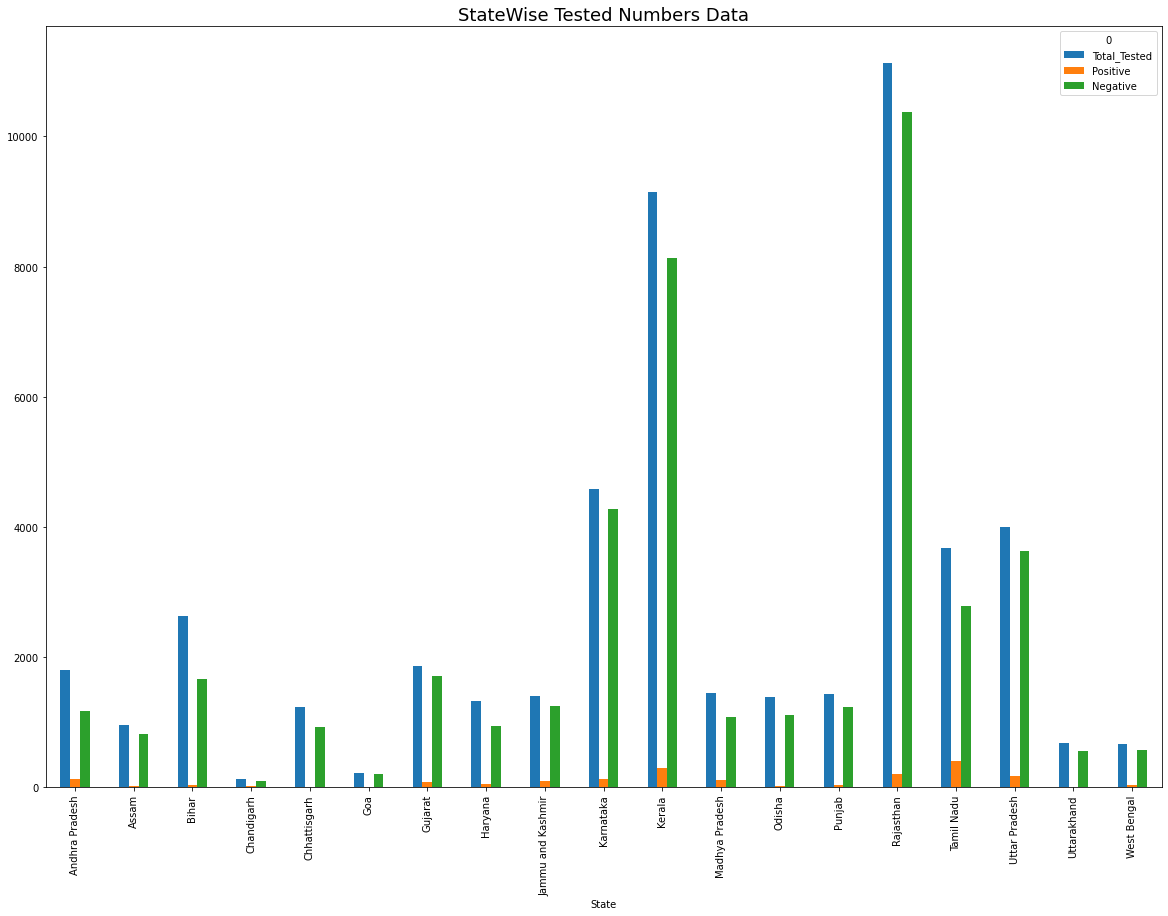

In [0]:
import csv
import requests
CSV_URL = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSc_2y5N0I67wDU38DjDh35IZSIS30rQf7_NYZhtYYGU1jJYT6_kDx4YpF-qw0LSlGsBYP8pqM_a1Pd/pub?output=csv&gid=1278947571'


with requests.Session() as s:
    download = s.get(CSV_URL)

    decoded_content = download.content.decode('utf-8')

    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)   
 
import pandas as pd
import numpy as np
df = pd.DataFrame(np.array(my_list))    
headers = df.iloc[0]
df  = pd.DataFrame(df.values[1:], columns=headers)
df = df.set_index('State')
cleanData = df.replace(to_replace='', value=np.nan)
cleanData = cleanData[cleanData['Total_Tested'].notna()]
cleanData = cleanData[cleanData['Positive'].notna()]
cleanData = cleanData[cleanData['Negative'].notna()]


ax = cleanData.iloc[:-1,0:3].astype(float).plot(kind='bar',figsize=(20,14));
ax.set_title("StateWise Tested Numbers Data", fontsize=18)

## Total Data

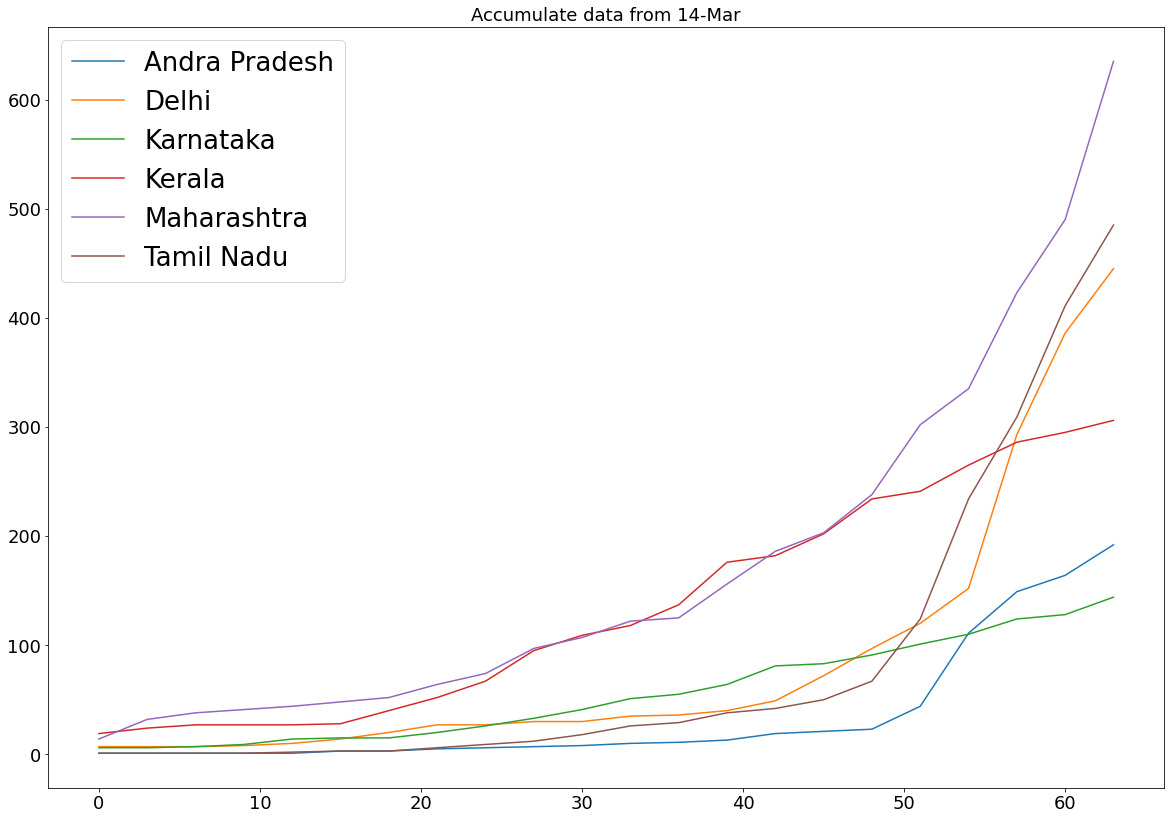

In [0]:
import csv
import requests
CSV_URL = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSc_2y5N0I67wDU38DjDh35IZSIS30rQf7_NYZhtYYGU1jJYT6_kDx4YpF-qw0LSlGsBYP8pqM_a1Pd/pub?output=csv&gid=1418809508'


with requests.Session() as s:
    download = s.get(CSV_URL)

    decoded_content = download.content.decode('utf-8')

    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)   
    
import pandas as pd
import numpy as np
df = pd.DataFrame(np.array(my_list))    
headers = df.iloc[0]
df  = pd.DataFrame(df.values[1:], columns=headers)    
df  = df.iloc[:66]
selectedData =  df.filter(['Status','AP','DL', 'KA','KL', 'MH', 'TN'], axis=1)
selectedData.columns = ['Status','Andra Pradesh','Delhi', 'Karnataka','Kerala', 'Maharashtra', 'Tamil Nadu']
selectedData = selectedData.iloc[0::3]
selectedData = selectedData.drop(['Status'], axis=1)
selectedData = selectedData.replace(to_replace='', value=0)
selectedData = selectedData.astype(float)
selectedData = selectedData.cumsum(axis=0)

lines = selectedData.plot.line(figsize=(20,14),fontsize=18)
lines.set_title("Accumulate data from 14-Mar", fontsize=18)
lines.legend(loc=2, prop={'size': 26})


## Activae case

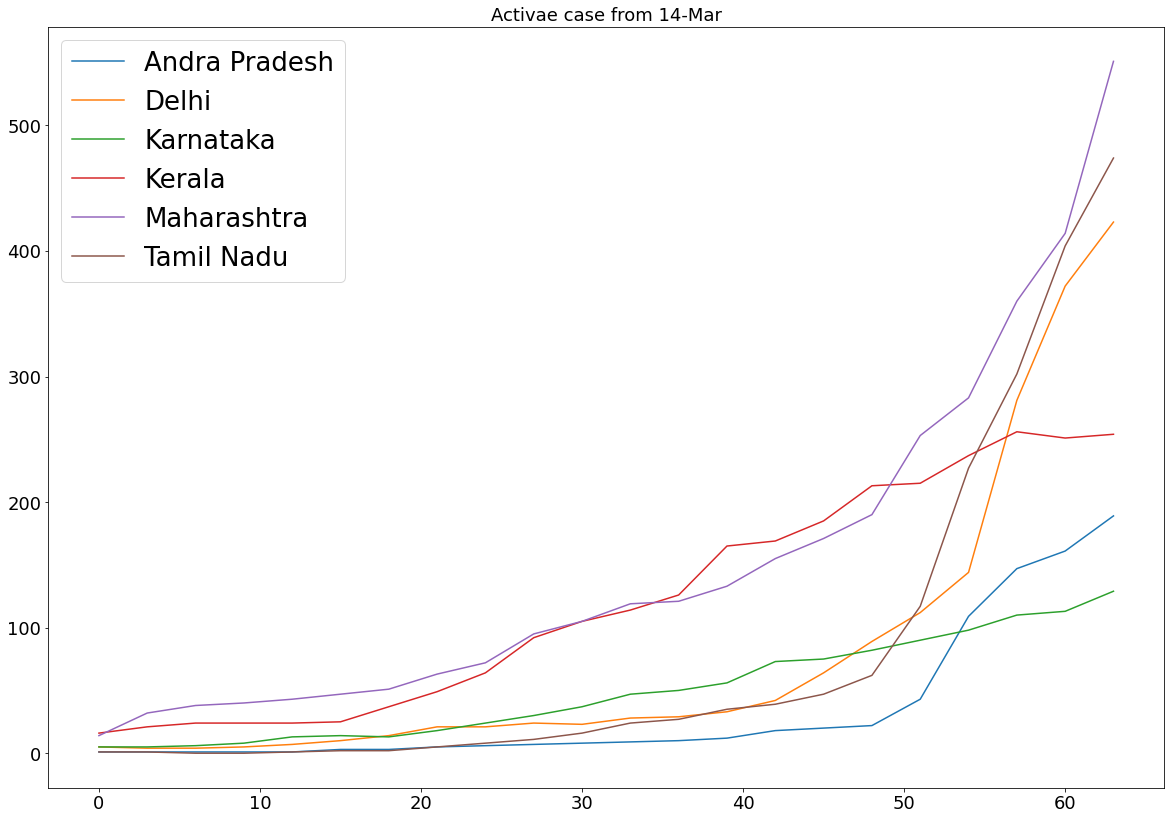

In [0]:
selectedData =  df.filter(['Status','AP','DL', 'KA','KL', 'MH', 'TN'], axis=1)
selectedData.columns = ['Status','Andra Pradesh','Delhi', 'Karnataka','Kerala', 'Maharashtra', 'Tamil Nadu']
selectedData = selectedData.replace(to_replace='', value=0)
selectedData = selectedData.drop(['Status'], axis=1)
selectedData = selectedData.astype(float)
for i in range(0,66,3):
    selectedData.iloc[i]-= selectedData.iloc[i+1]+selectedData.iloc[i+2]
selectedData = selectedData.iloc[0::3]
selectedData = selectedData.cumsum(axis=0)
lines = selectedData.plot.line(figsize=(20,14),fontsize=18)
lines.set_title("Activae case from 14-Mar", fontsize=18)
lines.legend(loc=2, prop={'size': 26})


All credits to https://www.covid19india.org/